### Importando módulos do python

In [4]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt

import gsw    ## cálculos com a equação de estado da água do mar
import cmocean    ## colormaps oceanografia

### Carregar arquivo netCDF no python

In [5]:
ls /data/bcg-argo/

SR6902892_040.nc*  SR6902974_045.nc*  SR6902983_011.nc*  SR6903080_001.nc*
SR6902894_040.nc*  SR6902981_036.nc*  SR6903071_007.nc*  SR6903085_009.nc*


In [6]:
data_dir = '/data/bcg-argo/' ### definir string para o conjunto de dados
filename = 'SR6902974_045.nc'
SR6902974 = Dataset(data_dir + filename)

In [7]:
SR6902974 ### ver metadados, dimensões e variáveis

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: Argo float vertical profile
    institution: CORIOLIS
    source: Argo float
    history: 2021-09-27T12:25:21Z creation (software version 1.11 (version 30.06.2020 for ARGO_simplified_profile))
    references: http://www.argodatamgt.org/Documentation
    user_manual_version: 1.0
    Conventions: Argo-3.1 CF-1.6
    featureType: trajectoryProfile
    software_version: 1.11 (version 30.06.2020 for ARGO_simplified_profile)
    dimensions(sizes): DATE_TIME(14), STRING256(256), STRING64(64), STRING32(32), STRING8(8), STRING4(4), STRING2(2), N_PROF(1), N_PARAM(4), N_LEVELS(1934), N_CALIB(1)
    variables(dimensions): |S1 DATA_TYPE(STRING32), |S1 FORMAT_VERSION(STRING4), |S1 HANDBOOK_VERSION(STRING4), |S1 REFERENCE_DATE_TIME(DATE_TIME), |S1 DATE_CREATION(DATE_TIME), |S1 DATE_UPDATE(DATE_TIME), |S1 PLATFORM_NUMBER(N_PROF, STRING8), |S1 PROJECT_NAME(N_PROF, STRING64), |S1 PI_NAME(N_PROF, S

In [8]:
SR6902974.variables.keys()

dict_keys(['DATA_TYPE', 'FORMAT_VERSION', 'HANDBOOK_VERSION', 'REFERENCE_DATE_TIME', 'DATE_CREATION', 'DATE_UPDATE', 'PLATFORM_NUMBER', 'PROJECT_NAME', 'PI_NAME', 'STATION_PARAMETERS', 'CYCLE_NUMBER', 'DIRECTION', 'DATA_CENTRE', 'PARAMETER_DATA_MODE', 'PLATFORM_TYPE', 'FLOAT_SERIAL_NO', 'FIRMWARE_VERSION', 'WMO_INST_TYPE', 'JULD', 'JULD_QC', 'JULD_LOCATION', 'LATITUDE', 'LONGITUDE', 'POSITION_QC', 'POSITIONING_SYSTEM', 'CONFIG_MISSION_NUMBER', 'PARAMETER', 'SCIENTIFIC_CALIB_EQUATION', 'SCIENTIFIC_CALIB_COEFFICIENT', 'SCIENTIFIC_CALIB_COMMENT', 'SCIENTIFIC_CALIB_DATE', 'PROFILE_PRES_QC', 'PROFILE_TEMP_QC', 'PROFILE_PSAL_QC', 'PROFILE_DOXY_QC', 'PRES', 'PRES_QC', 'PRES_ADJUSTED', 'PRES_ADJUSTED_QC', 'PRES_ADJUSTED_ERROR', 'TEMP', 'TEMP_QC', 'TEMP_dPRES', 'TEMP_ADJUSTED', 'TEMP_ADJUSTED_QC', 'TEMP_ADJUSTED_ERROR', 'PSAL', 'PSAL_QC', 'PSAL_dPRES', 'PSAL_ADJUSTED', 'PSAL_ADJUSTED_QC', 'PSAL_ADJUSTED_ERROR', 'DOXY', 'DOXY_QC', 'DOXY_dPRES', 'DOXY_ADJUSTED', 'DOXY_ADJUSTED_QC', 'DOXY_ADJUSTED

In [9]:
SR6902974['PRES']

<class 'netCDF4._netCDF4.Variable'>
float32 PRES(N_PROF, N_LEVELS)
    long_name: Sea water pressure, equals 0 at sea-level
    standard_name: sea_water_pressure
    _FillValue: 99999.0
    units: decibar
    valid_min: 0.0
    valid_max: 12000.0
    C_format: %7.1f
    FORTRAN_format: F7.1
    resolution: 0.1
    axis: Z
unlimited dimensions: 
current shape = (1, 1934)
filling on

In [10]:
SR6902974['LONGITUDE'][0].data, SR6902974['LATITUDE'][0].data, SR6902974['JULD'][0].data ### dados da coleta dos perfis

(array(-38.476945), array(48.59390167), array(26202.28819444))

In [11]:
ref_date = SR6902974['REFERENCE_DATE_TIME'][:].data ### dados de referência do dia juliano
''.join(list(map(lambda x: x.decode('utf-8'), ref_date))).strip() ### data em ano, mês, dia

'19500101000000'

### Perfil de temperatura

Text(0, 0.5, 'Sea water pressure [decibar]')

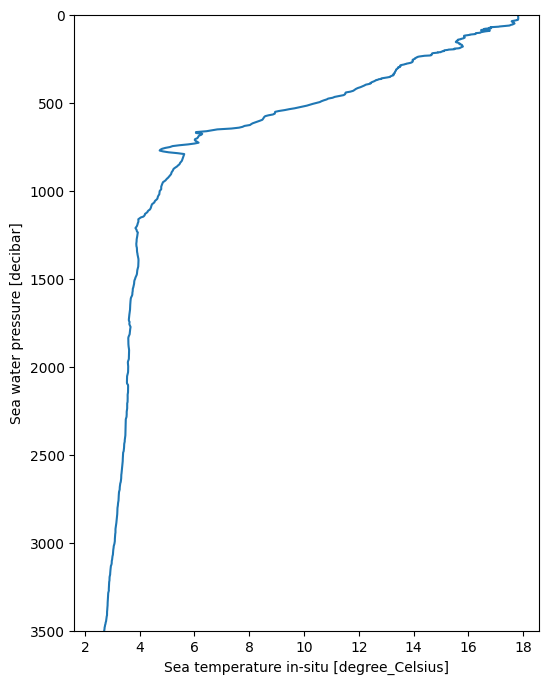

In [12]:
plt.figure(figsize=(6,8))

plt.plot(SR6902974['TEMP'][0],SR6902974['PRES'][0])
plt.ylim(3500,0) ### inverte a escala de pressão

plt.xlabel(SR6902974['TEMP'].long_name[:23] + ' [' + SR6902974['TEMP'].units + ']')
plt.ylabel(SR6902974['PRES'].long_name[:18] + ' [' + SR6902974['PRES'].units + ']') ### netCDF já com os labels e unidades
                                    ### [:18] tira a referência da pressão em superfície
#plt.savefig('p2_temperature_profile.png',dpi=100)

### Perfis de Salinidade e Oxigênio Dissolvido

Text(0, 0.5, 'Sea water pressure [decibar]')

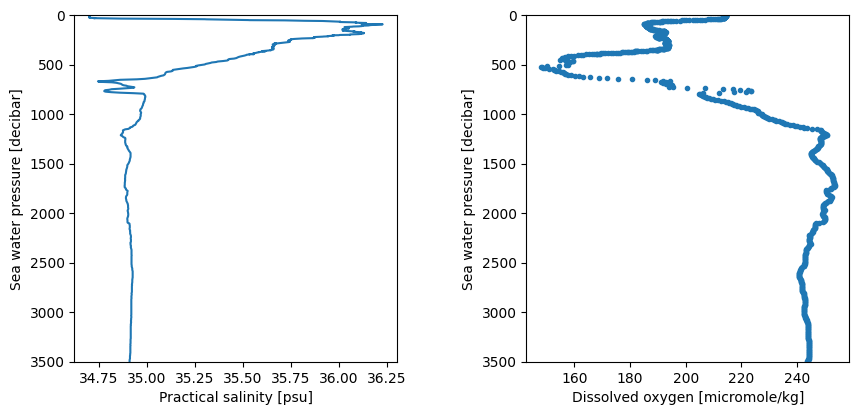

In [13]:
fig = plt.figure(figsize=(10,4.5))

ax1 = fig.add_subplot(121)
plt.plot(SR6902974['PSAL'][0], SR6902974['PRES'][0])
plt.ylim(3500,0)
plt.xlabel(SR6902974['PSAL'].long_name + ' [' + SR6902974['PSAL'].units + ']')
plt.ylabel(SR6902974['PRES'].long_name[:18] + ' [' + SR6902974['PRES'].units + ']')

fig.subplots_adjust(wspace=.4) ### ajusta o espaço entre os subplots

ax2 = fig.add_subplot(122)
plt.plot(SR6902974['DOXY'][0], SR6902974['PRES'][0], '.-') ### como os valores não são contínuos, precisa adicionar um marcador
plt.ylim(3500,0)
plt.xlabel(SR6902974['DOXY'].long_name + ' [' + SR6902974['DOXY'].units + ']')
plt.ylabel(SR6902974['PRES'].long_name[:18] + ' [' + SR6902974['PRES'].units + ']')

#plt.savefig('p2_salinity_oxygen_profile.png',dpi=100)

### Criar dicionários para os dados por meio de uma função previamente escrita

In [14]:
def jstring(bstring):
    return ''.join(list(map(lambda bstring: bstring.decode('utf-8'), bstring))).strip()

def netCDFtoDict(dataset): 

    # mask gaps
    doxy = dataset['DOXY_ADJUSTED'][0].data
    doxy = np.ma.masked_where(doxy==99999.,doxy)
    
    profile_dict = dict(platform=jstring(dataset['PLATFORM_NUMBER'][0].data),
                        longitude=dataset['LONGITUDE'][0].data,
                        latitude=dataset['LATITUDE'][0].data,
                        pressure=dataset['PRES_ADJUSTED'][0].data,
                        temperature=dataset['TEMP_ADJUSTED'][0].data,
                        salinity=dataset['PSAL_ADJUSTED'][0].data,
                        doxygen=doxy,
    )
    
    return profile_dict
    ### cria a função que será aplicada aos datasets

In [15]:
filename = 'SR6902974_045.nc'            
SD6903573 = netCDFtoDict(Dataset(data_dir + filename))

In [16]:
import glob
filenames = glob.glob(data_dir + '/*.nc') 
### quando usar a string 'filenames' o módulo obtém o nome dos arquivos e o caminho dentro de data_dir
print(filenames)

['/data/bcg-argo/SR6903080_001.nc', '/data/bcg-argo/SR6903085_009.nc', '/data/bcg-argo/SR6902983_011.nc', '/data/bcg-argo/SR6902894_040.nc', '/data/bcg-argo/SR6902981_036.nc', '/data/bcg-argo/SR6903071_007.nc', '/data/bcg-argo/SR6902892_040.nc', '/data/bcg-argo/SR6902974_045.nc']


In [17]:
filenames[0][-16:-3] ### dentro de 'filenames' primeiro elemento ou flutuador [0] nas posições da string [-16:-3]

'SR6903080_001'

In [18]:
# Colocando tudo junto: percorra os nomes dos arquivos, carregue o conjunto de dados netCDF e coloque as informações básicas em um dicionário
floats = [] ### contém o nome ou ID de cada flutuador
for filename in filenames:
    dname = filename[15:-7]
    print('Generating dictionary '+ dname) ### imprime o nome do dicionário gerado para cada arquivo
    dataset=Dataset(filename) ### aplica Dataset a cada arquivo referido como 'filename' em 'filenames'
    exec(dname + ' = netCDFtoDict(dataset)') ### executa a função definida para criar dicionários com os dados
    floats.append(dname) ### adiciona o ID do flutuador ou nome do dicionário à lista de flutuadores

Generating dictionary SR6903080
Generating dictionary SR6903085
Generating dictionary SR6902983
Generating dictionary SR6902894
Generating dictionary SR6902981
Generating dictionary SR6903071
Generating dictionary SR6902892
Generating dictionary SR6902974


In [19]:
floats

['SR6903080',
 'SR6903085',
 'SR6902983',
 'SR6902894',
 'SR6902981',
 'SR6903071',
 'SR6902892',
 'SR6902974']

In [20]:
SR6903080.keys()

dict_keys(['platform', 'longitude', 'latitude', 'pressure', 'temperature', 'salinity', 'doxygen'])

### Gerar mapa simples das posições dos flutuadores com cartopy

In [21]:
import cartopy.crs as ccrs

(-70.0, 80.0)

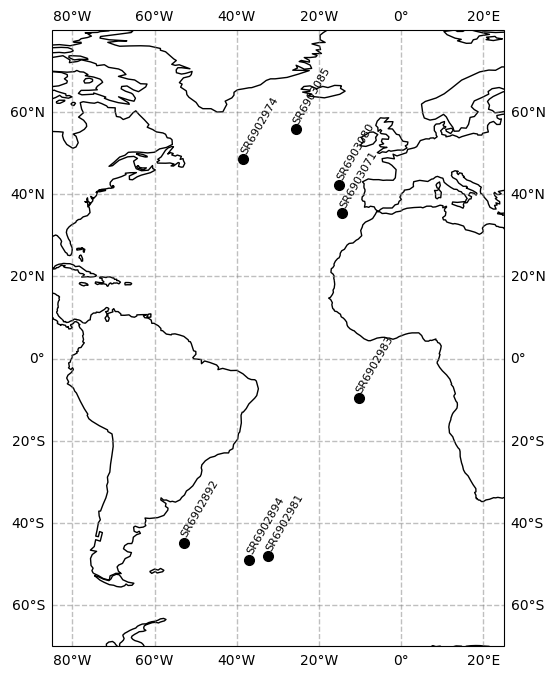

In [22]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
             linewidth=1, color='gray', alpha=0.5, linestyle='--') ### ajusta o grid e adiciona labels a ele
ax.coastlines()

for profile in floats: ### roda o argo = eval() para cada 'profile' ou elemento de 'floats'
    
    argo=eval(profile)
    
    ax.plot(argo['longitude'],
            argo['latitude'],
            marker='o',
            markersize=7,
            color='k') ### plot dos pontos dos flutuadores
    
    ax.text(argo['longitude']-1.0,
            argo['latitude']+1.5,
            profile,
            color='k',
            rotation=60,
            fontsize=8) ### adicionar labels aos pontos dos flutuadores
    
ax.set_xlim(-85,25)
ax.set_ylim(-70,80) ### ajusta a escala do mapa

#plt.savefig('p2_floats_coastline.png',dpi=100)

### Cálculo da temperatura potencial e densidade potencial

In [23]:
for float_name in floats:
    
    print('Calculating derived fields for ' + float_name)
    
    profile = eval(float_name) ### usar 'profile' como string/nome genérico e objeto no python
 
    #3.1  
    profile['ptemperature'] = gsw.pt_from_t(profile['salinity'],
                                            profile['temperature'],
                                            profile['pressure'],
                                            p_ref=0)

    #3.2
    profile['ctemperature'] = gsw.CT_from_pt(profile['salinity'],
                                            profile['ptemperature'])

    #3.3
    profile['sigma0'] = gsw.sigma0(profile['salinity'],
                                    profile['ctemperature'])

Calculating derived fields for SR6903080
Calculating derived fields for SR6903085
Calculating derived fields for SR6902983
Calculating derived fields for SR6902894
Calculating derived fields for SR6902981
Calculating derived fields for SR6903071
Calculating derived fields for SR6902892
Calculating derived fields for SR6902974


#### Helpers das funções acima (gsw.pt_from_t, gsw.CT_from_pt, gsw.sigma0)

In [24]:
gsw.pt_from_t?

Signature: gsw.pt_from_t(SA, t, p, p_ref)
Docstring:
Calculates potential temperature with the general reference pressure,
p_ref, from in-situ temperature, t.  This function calls
"gsw_entropy_part" which evaluates entropy except for the parts which
are a function of Absolute Salinity alone.
A faster gsw routine exists if p_ref is indeed zero dbar.  This routine
is "gsw_pt0_from_t(SA,t,p)".

Parameters
----------
SA : array-like
    Absolute Salinity, g/kg
t : array-like
    In-situ temperature (ITS-90), degrees C
p : array-like
    Sea pressure (absolute pressure minus 10.1325 dbar), dbar
p_ref : array-like
    Reference pressure, dbar

Returns
-------
pt : array-like, deg C
    potential temperature with reference pressure, p_ref, on the
    ITS-90 temperature scale
File:      /opt/jupyterhub/lib/python3.10/site-packages/gsw/_wrapped_ufuncs.py
Type:      function

In [25]:
gsw.CT_from_pt?

Signature: gsw.CT_from_pt(SA, pt)
Docstring:
Calculates Conservative Temperature of seawater from potential
temperature (whose reference sea pressure is zero dbar).

Parameters
----------
SA : array-like
    Absolute Salinity, g/kg
pt : array-like
    Potential temperature referenced to a sea pressure, degrees C

Returns
-------
CT : array-like, deg C
    Conservative Temperature (ITS-90)
File:      /opt/jupyterhub/lib/python3.10/site-packages/gsw/_wrapped_ufuncs.py
Type:      function

In [26]:
gsw.sigma0?

Signature: gsw.sigma0(SA, CT)
Docstring:
Calculates potential density anomaly with reference pressure of 0 dbar,
this being this particular potential density minus 1000 kg/m^3.  This
function has inputs of Absolute Salinity and Conservative Temperature.
This function uses the computationally-efficient expression for
specific volume in terms of SA, CT and p (Roquet et al., 2015).

Parameters
----------
SA : array-like
    Absolute Salinity, g/kg
CT : array-like
    Conservative Temperature (ITS-90), degrees C

Returns
-------
sigma0 : array-like, kg/m^3
    potential density anomaly with
    respect to a reference pressure of 0 dbar,
    that is, this potential density - 1000 kg/m^3.
File:      /opt/jupyterhub/lib/python3.10/site-packages/gsw/_wrapped_ufuncs.py
Type:      function

### Perfis simples (propriedade vs. pressão)
Perfis de temperatura potencial, salinidade, densidade potencial e oxigênio dissolvido.

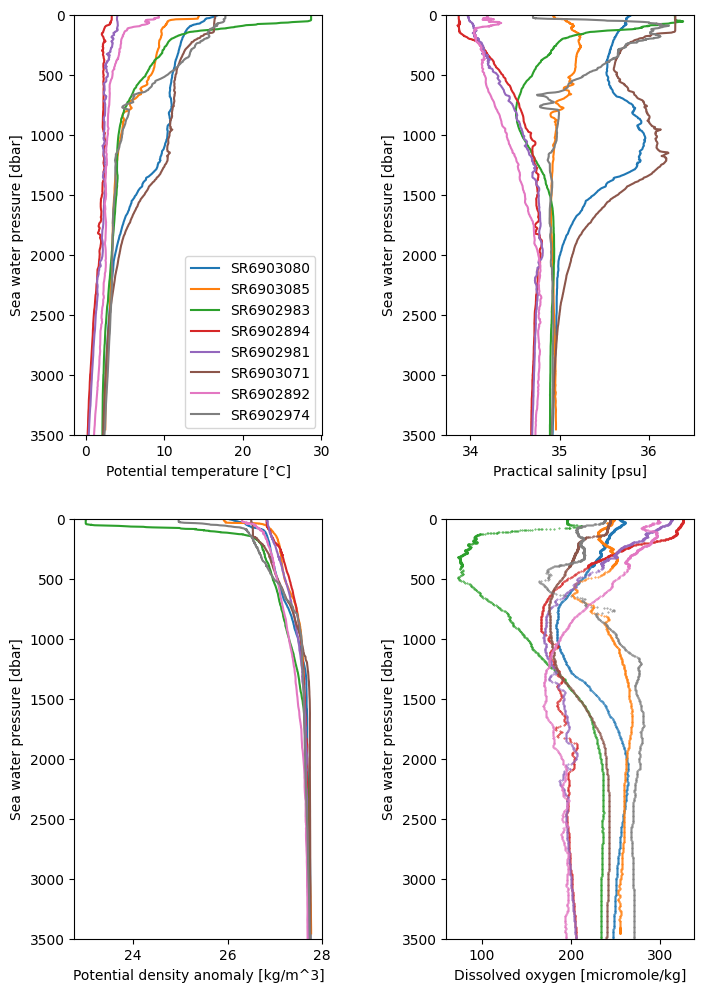

In [27]:
fig = plt.figure(figsize=(8,12))

ax1 = fig.add_subplot(221)
for float_name in floats:
    argo = eval(float_name)
    plt.plot(argo['ptemperature'], argo['pressure'], label = float_name)
    plt.ylim(3500,0)
    plt.legend()
ax1.set_xlabel('Potential temperature [°C]')
ax1.set_ylabel('Sea water pressure [dbar]')

ax2 = fig.add_subplot(222)
for float_name in floats:
    argo = eval(float_name)
    plt.plot(argo['salinity'], argo['pressure'])
    plt.ylim(3500,0)
ax2.set_xlabel('Practical salinity [psu]')
ax2.set_ylabel('Sea water pressure [dbar]')

ax3 = fig.add_subplot(223)
for float_name in floats:
    argo = eval(float_name)
    plt.plot(argo['sigma0'], argo['pressure'])
    plt.ylim(3500,0)
ax3.set_xlabel('Potential density anomaly [kg/m^3]')
ax3.set_ylabel('Sea water pressure [dbar]')

ax4 = fig.add_subplot(224)
for float_name in floats:
    argo = eval(float_name)
    plt.plot(argo['doxygen'], argo['pressure'],'.',markersize=.8)
    plt.ylim(3500,0)
ax4.set_xlabel('Dissolved oxygen [micromole/kg]')
ax4.set_ylabel('Sea water pressure [dbar]')

fig.subplots_adjust(wspace=.5)

#plt.savefig('p2_argo_profiles.png',dpi=100)

### Comparação temperaturas potencial, in-situ e conservativa

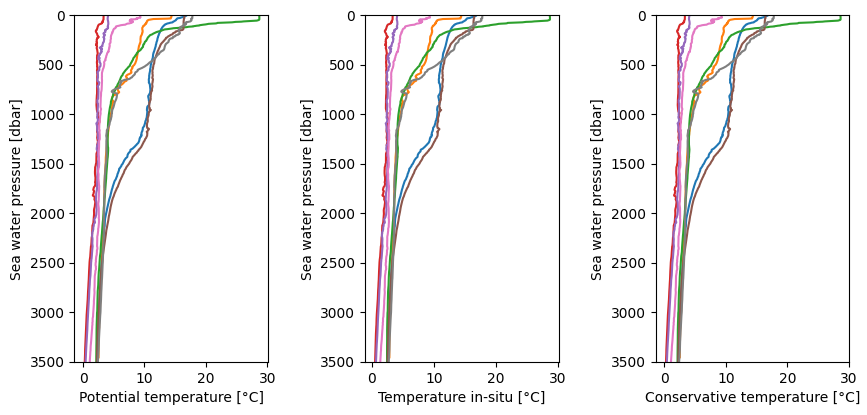

In [32]:
fig = plt.figure(figsize=(10,4.5))

ax1 = fig.add_subplot(131)
for float_name in floats:
    argo = eval(float_name)
    plt.plot(argo['ptemperature'], argo['pressure'])
    plt.ylim(3500,0)
ax1.set_xlabel('Potential temperature [°C]')
ax1.set_ylabel('Sea water pressure [dbar]')

ax2 = fig.add_subplot(132)
for float_name in floats:
    argo = eval(float_name)
    plt.plot(argo['temperature'], argo['pressure'])
    plt.ylim(3500,0)
ax2.set_xlabel('Temperature in-situ [°C]')
ax2.set_ylabel('Sea water pressure [dbar]')

ax3 = fig.add_subplot(133)
for float_name in floats:
    argo = eval(float_name)
    plt.plot(argo['ctemperature'], argo['pressure'])
    plt.ylim(3500,0)
ax3.set_xlabel('Conservative temperature [°C]')
ax3.set_ylabel('Sea water pressure [dbar]')

fig.subplots_adjust(wspace=.5)

### Perfis em função da latitude

Text(0, 0.5, 'Sea water pressure [dbar]')

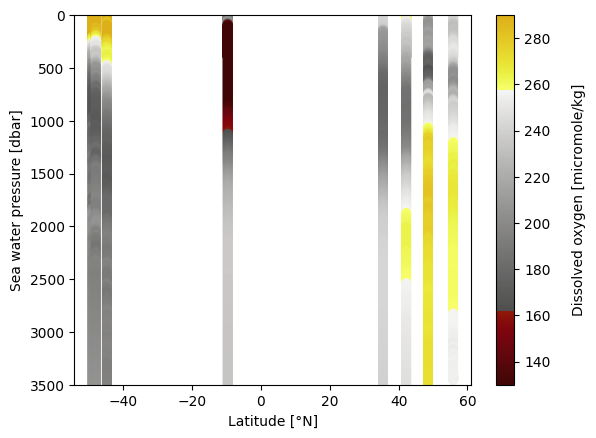

In [378]:
plt.figure()
plt.ylim(3500,0)

for float_name in floats:
    argo = eval(float_name)
    argo['lat'] = np.ones(len(argo['pressure']))*argo['latitude']
    plt.scatter(argo['lat'],argo['pressure'],c=argo['doxygen'],cmap='cmo.oxy',vmin=130,vmax=290)

plt.colorbar(label='\nDissolved oxygen [micromole/kg]')
plt.xlabel('Latitude [°N]')
plt.ylabel('Sea water pressure [dbar]')

#plt.savefig('p2_oxygen_cross_section')

### Gráficos de propriedade

<a list of 6 text.Text objects>

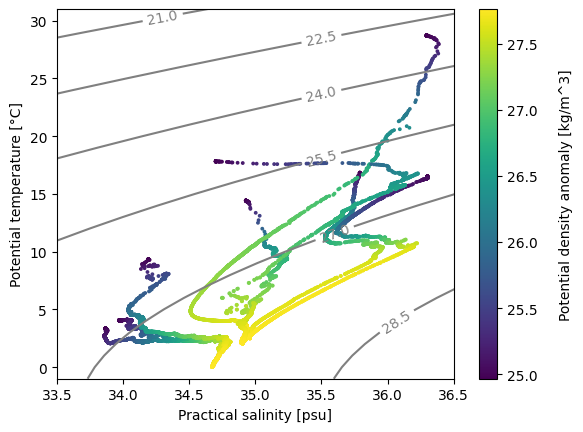

In [288]:
for float_name in floats:
    argo = eval(float_name)
    plt.scatter(argo['salinity'], argo['ptemperature'], c=argo['sigma0'], s=3)
    plt.ylim(-1,31)
    plt.xlim(33.5,36.5)
plt.xlabel('Practical salinity [psu]')
plt.ylabel('Potential temperature [°C]')
plt.colorbar(label='\nPotential density anomaly [kg/m^3]')

x = np.arange(33.5,36.8,0.1)
y = np.arange(-1,33,1)
X,Y = np.meshgrid(x,y)
f=gsw.sigma0(X,Y)

fig = plt.contour(X,Y,f,colors='grey')
plt.clabel(fig)

#plt.savefig('p2_theta_s.png',dpi=100)

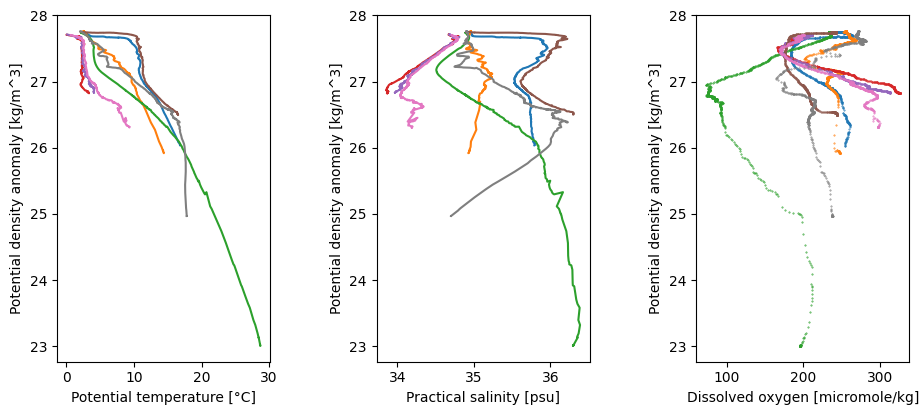

In [289]:
fig = plt.figure(figsize=(11,4.5))

ax1 = fig.add_subplot(131)
for float_name in floats:
    argo = eval(float_name)
    plt.plot(argo['ptemperature'], argo['sigma0'])
ax1.set_xlabel('Potential temperature [°C]')
ax1.set_ylabel('Potential density anomaly [kg/m^3]')

ax2 = fig.add_subplot(132)
for float_name in floats:
    argo = eval(float_name)
    plt.plot(argo['salinity'], argo['sigma0'])
ax2.set_xlabel('Practical salinity [psu]')
ax2.set_ylabel('Potential density anomaly [kg/m^3]')

ax3 = fig.add_subplot(133)
for float_name in floats:
    argo = eval(float_name)
    plt.plot(argo['doxygen'], argo['sigma0'],'.', markersize=.8)
ax3.set_xlabel('Dissolved oxygen [micromole/kg]')
ax3.set_ylabel('Potential density anomaly [kg/m^3]')

fig.subplots_adjust(wspace=.5)

#plt.savefig('p2_density_variable.png',dpi=100)